# centernet.py テスト
- C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\model\centernet.py 

In [1]:
import sys
print(sys.executable)

C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v4\python.exe


In [2]:
import os
import sys
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))# 75%

In [3]:
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from model import centernet

%reload_ext autoreload
%autoreload 2

C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v4\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ndimage.py: loaded as module file
centernet.py: loaded as module file


In [36]:
out_dir = r'D:\work\kaggle_kuzushiji-recognition\work\CenterNet -Keypoint Detector\test_centernet_py'
os.makedirs(out_dir, exist_ok=True)

category_n=1
input_width,input_height=512, 512
output_height,output_width = input_width//4,input_height//4

df_train:


image_id                                             labels
0  100241706_00004_2  U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1  100241706_00005_1  U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2  100241706_00005_2  U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3  100241706_00006_1  U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4  100241706_00007_2  U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...


category_names: ['U+003F', 'U+2000B', 'U+20D45', 'U+2123D', 'U+22999']

annotation_list_train:
[['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/100241706_00004_2.jpg', array([[  84, 1297, 3491,  133,   53],
       [  49,  317, 1686,   84,   69],
       [  44, 1566, 1252,  143,   69],
       [  54,  246, 3376,   53,   91],
       [  80,  941, 1498,   61,   92],
       [  80,  962, 3491,   71,   92],
       [  83,  951, 2925,   95,   92],
       [1113, 1261, 1443,  187,   95],
       [  56,  323, 3214,   69,   97],
       [ 237,  957, 3087,  121,  107],
       [  83,  617, 1966,  141,  108],
       [ 105, 1564, 2729,  151,  109],
       [  77, 1588, 3037,   55,  116],
       [1119, 1576, 2558,  127,  117],
       [ 103, 1249, 1582,   72,  119],
       [  58, 1266, 3328,   95,  124],
       [  83,  293, 2292,   68,  125],
       [  83, 1268, 2485,  169,  125],
       [ 244,  930, 2299,  163,  127],
       [2696, 1244, 1276,  200,  128],
       [  66

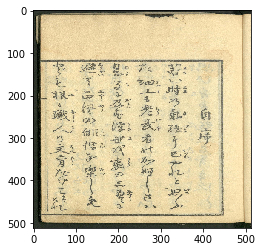

In [3]:
data_dir = r'D:\work\kaggle_kuzushiji-recognition\OrigData\kuzushiji-recognition'
path_1 = data_dir+"/train.csv"
path_2 = data_dir+"/train_images/"
path_3 = data_dir+"/test_images/"
path_4 = data_dir+"/sample_submission.csv"

df_train, category_names, inv_dict_cat, annotation_list_train, id_test, df_submission = \
centernet.convert_input_data(path_1, path_2, path_3, path_4, input_width= 512, input_height=512)

## STEP 1: Preprocessing (Check Object Size)

100%|██████████████████████████████████████████████████████████████████████████████| 4150/4150 [00:47<00:00, 87.41it/s]


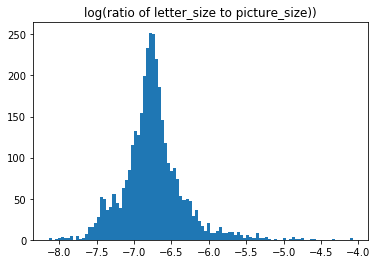

In [8]:
aspect_ratio_pic_all, aspect_ratio_pic_all_test, average_letter_size_all, train_input_for_size_estimate = \
centernet.preprocess_check_object_size(annotation_list_train, id_test, out_dir=out_dir)

### Create Model

In [17]:
model = centernet.create_sizecheck_model(input_height, input_width, out_dir=out_dir)

centernet.py: loaded as module file
centernet.py: loaded as module file
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 16) 0           batch_normalization_1[0][0]      
_____________________________________

__________________________________________________________________________________________________
add_7 (Add)                     (None, 16, 16, 256)  0           leaky_re_lu_22[0][0]             
                                                                 add_6[0][0]                      
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 256)  590080      add_7[0][0]                      
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 16, 16, 256)  1024        conv2d_23[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_23 (LeakyReLU)      (None, 16, 16, 256)  0           batch_normalization_23[0][0]     
__________________________________________________________________________________________________
conv2d_24 

### Training

In [19]:
from sklearn.model_selection import KFold,train_test_split

# train/validation set作成
train_list, cv_list = train_test_split(train_input_for_size_estimate, random_state = 111, test_size = 0.2)
print(train_list[:5])
print(cv_list[:5])

learning_rate = 0.0005
n_epoch = 1#12
batch_size = 8#32

hist = centernet.fit_sizecheck_model(model, train_list, cv_list, n_epoch, batch_size, lr=learning_rate, out_dir=out_dir)

model.load_weights(out_dir+'/final_weights_step1.hdf5')

centernet.py: loaded as module file
centernet.py: loaded as module file
[['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/200021712-00022_2.jpg', -6.966739922505915], ['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/hnsd005-009.jpg', -6.7595588806525155], ['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/200005598_00026_2.jpg', -6.782329007747987], ['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/200021660-00043_2.jpg', -7.2809494384213975], ['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/200014740-00027_2.jpg', -6.802399745070172]]
[['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/100249371_00022_2.jpg', -6.828128674959087], ['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/hnsd003-012.jpg', -7.034294124295312], ['D:\\work\\

### Result

centernet.py: loaded as module file
centernet.py: loaded as module file
load_weights


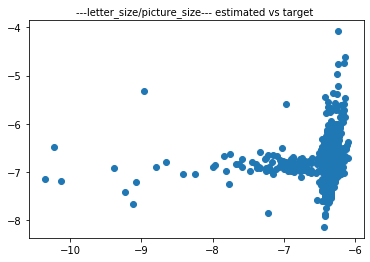

In [24]:
model = centernet.create_sizecheck_model(input_height, input_width, out_dir=out_dir
                                         , hdf5_path=out_dir+'/final_weights_step1.hdf5'
                                         , is_summary=False
                                        )
centernet.plot_predict_sizecheck_model(model, cv_list, batch_size, out_dir=out_dir)

train setについてのlog(文字サイズ÷ピクチャサイズ) の値を推定する回帰モデルの予測結果を取得し、  
    step2のモデルで使うために、検出できるのはせいぜい25x25くらいだと考えて、画像データの分割数を適当に決める

centernet.py: loaded as module file
centernet.py: loaded as module file
recommended height split:[1.4722537], recommended width_split:[1.]


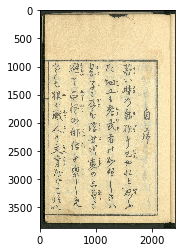

In [32]:
annotation_list_train_w_split = centernet.get_train_w_split_predict_sizecheck_model(model
                                                                                    , train_input_for_size_estimate
                                                                                    , aspect_ratio_pic_all
                                                                                    , annotation_list_train
                                                                                   )

## STEP 2: Detection by CenterNet

### Create Model

In [33]:
model = centernet.create_centernet(input_height, input_width
                                   , step1_hdf5_path=out_dir+'/final_weights_step1.hdf5'
                                   , out_dir=out_dir)

centernet.py: loaded as module file
centernet.py: loaded as module file
step1_hdf5 load_weights
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 16) 0           batch_normalization_1[0][0]      
_____________

leaky_re_lu_22 (LeakyReLU)      (None, 16, 16, 256)  0           batch_normalization_22[0][0]     
__________________________________________________________________________________________________
add_7 (Add)                     (None, 16, 16, 256)  0           leaky_re_lu_22[0][0]             
                                                                 add_6[0][0]                      
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 256)  590080      add_7[0][0]                      
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 16, 16, 256)  1024        conv2d_23[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_23 (LeakyReLU)      (None, 16, 16, 256)  0           batch_normalization_23[0][0]     
__________

conv2d_48 (Conv2D)              (None, 16, 16, 5)    455         concatenate_9[0][0]              
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 64, 64, 5)    55          concatenate_4[0][0]              
__________________________________________________________________________________________________
conv2d_transpose_5 (Conv2DTrans (None, 64, 64, 5)    100         leaky_re_lu_47[0][0]             
__________________________________________________________________________________________________
batch_normalization_37 (BatchNo (None, 128, 128, 5)  20          conv2d_37[0][0]                  
__________________________________________________________________________________________________
batch_normalization_38 (BatchNo (None, 128, 128, 5)  20          conv2d_transpose_1[0][0]         
__________________________________________________________________________________________________
batch_norm

### Training

In [34]:
from sklearn.model_selection import KFold,train_test_split

# train/validation set作成
train_list, cv_list = train_test_split(annotation_list_train_w_split, random_state=111, test_size=0.2)#stratified split is better
print(train_list[:1])
print(cv_list[:1])

learning_rate = 0.001
n_epoch = 1#30
batch_size = 32

hist = centernet.fit_centernet(model, train_list, cv_list, n_epoch, batch_size, lr=learning_rate, out_dir=out_dir)

model.load_weights(out_dir+'/final_weights_step2.hdf5')

centernet.py: loaded as module file
centernet.py: loaded as module file
[['D:\\work\\kaggle_kuzushiji-recognition\\OrigData\\kuzushiji-recognition/train_images/200021712-00022_2.jpg', array([[ 232, 1401, 1685,   92,   13],
       [ 232,  827, 3270,   99,   13],
       [ 232, 1789, 2353,   97,   16],
       [ 232, 1796,  891,  108,   29],
       [ 192, 1267, 2940,   62,   36],
       [ 192,  899, 2133,   40,   39],
       [  84, 1789, 1968,   83,   44],
       [  84, 1599, 3277,   63,   45],
       [  93, 1218, 3418,  100,   46],
       [  84,  446, 1960,   69,   51],
       [  48,  631, 3409,   34,   52],
       [ 277, 1795, 1173,  103,   56],
       [  44,  437, 3358,   85,   61],
       [ 633, 1592, 3151,   62,   62],
       [  48,  637, 2750,   41,   65],
       [  83, 1596, 2469,   76,   70],
       [  83, 1788, 1293,   79,   70],
       [  48,  641, 2229,   36,   72],
       [ 461,  839, 2090,  129,   76],
       [  83, 1408, 1306,   93,   78],
       [  64,  824, 1581,   74,   79

       [1585,  900, 1636,   71,  221]]), array([1.4720987], dtype=float32), array([1.], dtype=float32)]]
Epoch 1/1
 - 461s - loss: 5.6944 - heatmap_loss: 3.8096 - size_loss: 1.3885 - offset_loss: 0.4963 - val_loss: 2.8484 - val_heatmap_loss: 1.7600 - val_size_loss: 0.6151 - val_offset_loss: 0.4732

Epoch 00001: val_loss improved from inf to 2.84836, saving model to D:\work\kaggle_kuzushiji-recognition\work\CenterNet -Keypoint Detector\test_centernet_py\final_weights_step2.hdf5


### Result

centernet.py: loaded as module file
centernet.py: loaded as module file
IoU score:0.135


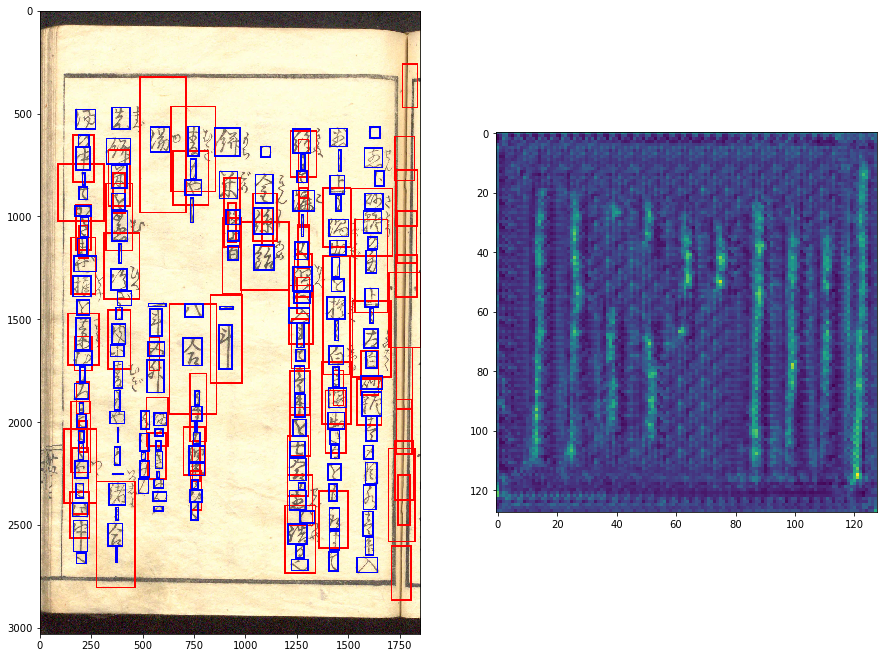

IoU score:0.004


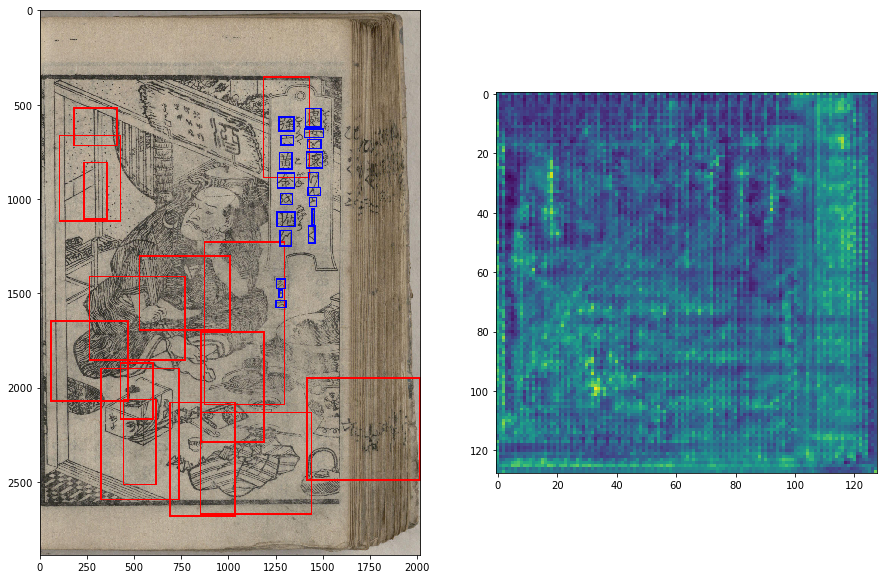

IoU score:0.301


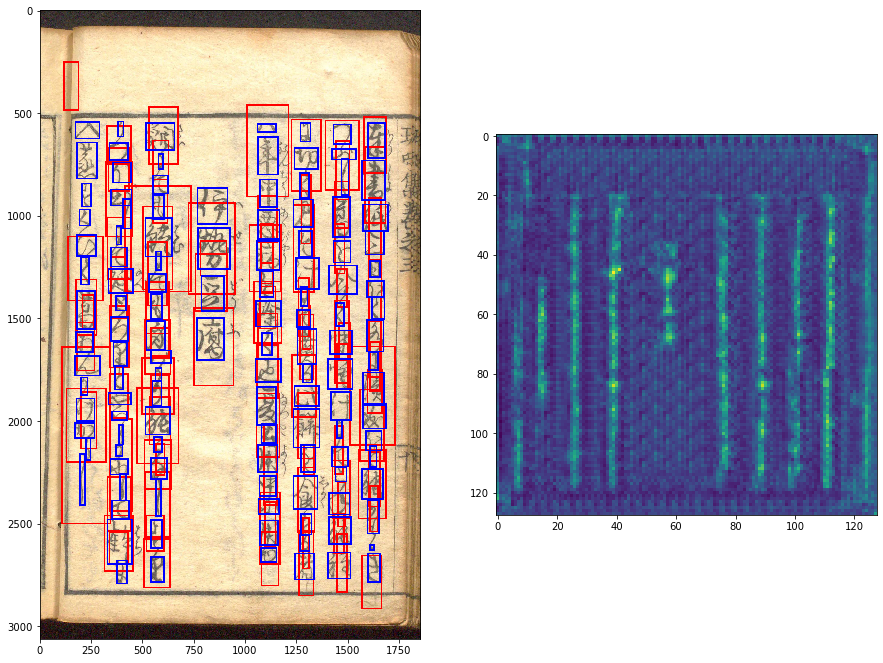

IoU score:0.19


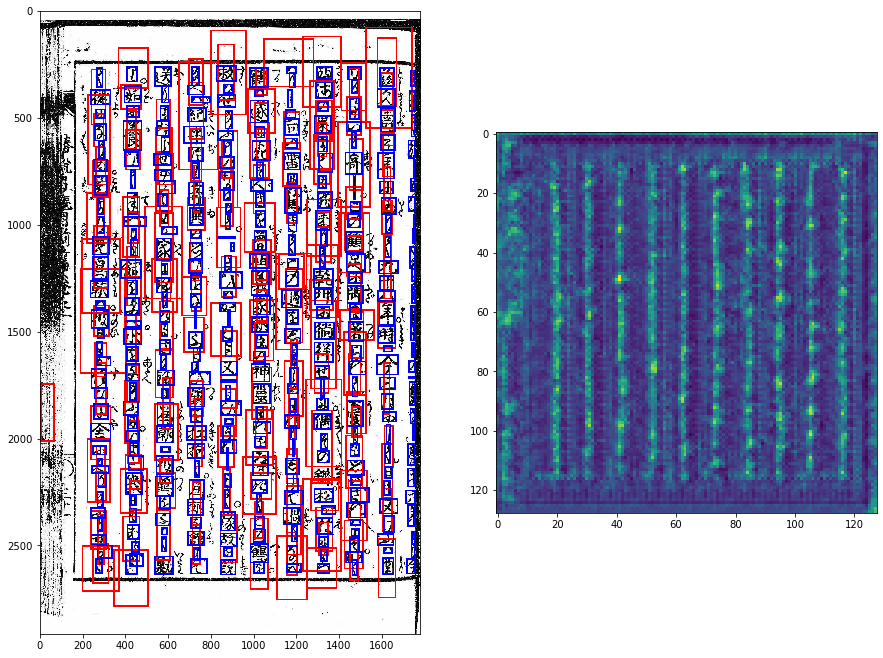

IoU score:0.219


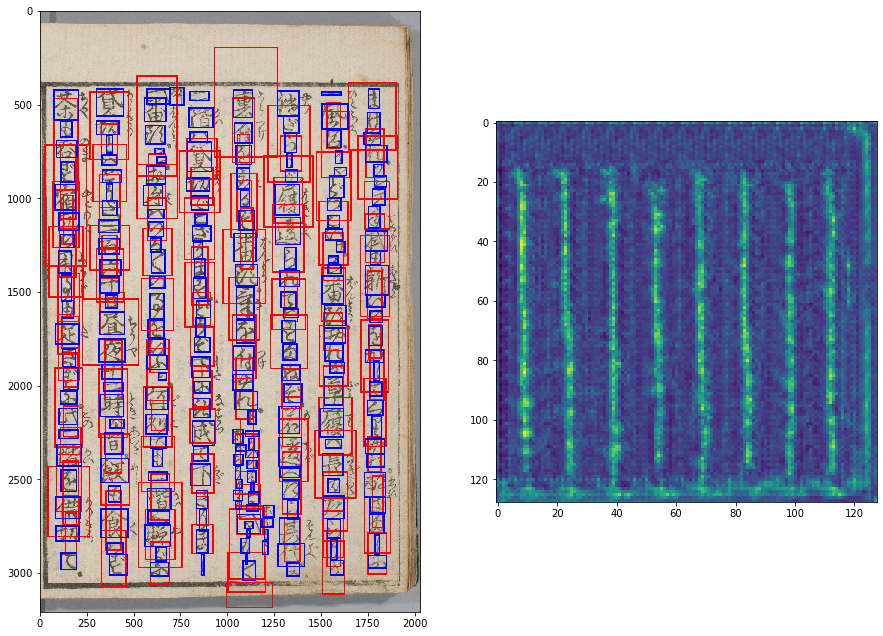

In [44]:
predict_valid_img_dir = out_dir+'/predict_valid_img'
os.makedirs(predict_valid_img_dir, exist_ok=True)

centernet.show_predict_centernet(model, cv_list
                                 , show_count=5, score_thresh=0.3, iou_thresh=0.4
                                 , out_dir=predict_valid_img_dir)

Step1で得た分割数を適当に使って、分割した画像に対してそれぞれCenterNetにかけて、得られたデータをすべてひっくるめてNMSに投げる

centernet.py: loaded as module file
centernet.py: loaded as module file
IoU score:0.349


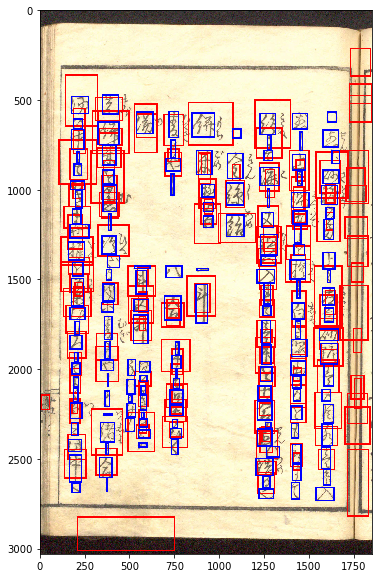

IoU score:0.073


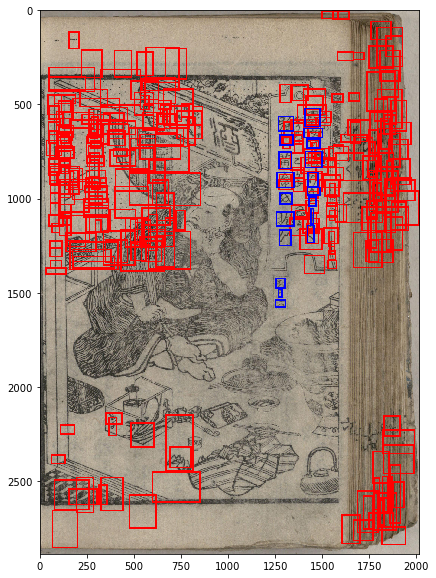

IoU score:0.479


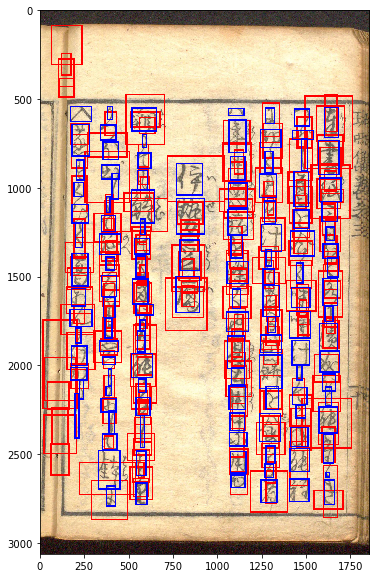

IoU score:0.42


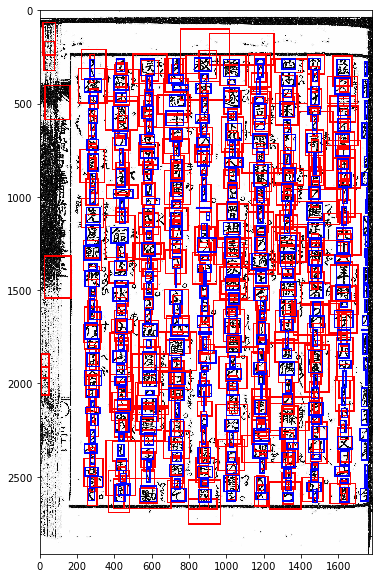

IoU score:0.447


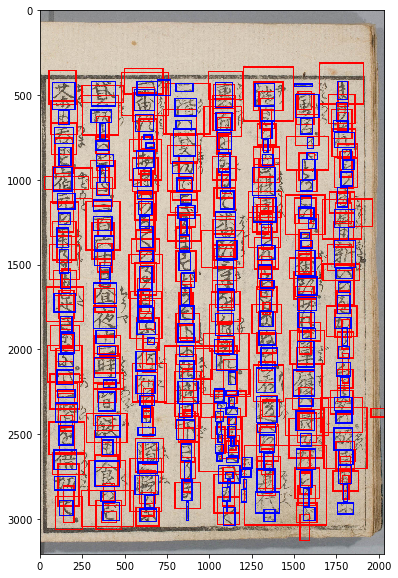

average_score: 0.3536237091189924


In [51]:
predict_valid_img_dir = out_dir+'/predict_valid_img'
os.makedirs(predict_valid_img_dir, exist_ok=True)

centernet.show_predict_centernet_split(model, cv_list
                                       , show_count=5, score_thresh=0.3, iou_thresh=0.4
                                       , out_dir=predict_valid_img_dir)

## Test & Submit

In [64]:
class_h5 = r'D:\work\kaggle_kuzushiji-recognition\work\classes\20190816\best_val_acc.h5'

model_1, model_2, model_3 = centernet.kuzushiji_model_pipeline(out_dir, class_h5=class_h5)

centernet.py: loaded as module file
centernet.py: loaded as module file
loading models...


In [67]:
# 分類モデルのidとunicodeの対応表ロード
df_class = pd.read_csv(r'D:\work\kaggle_kuzushiji-recognition\work\classes\20190816\tfAPI_dict_class.tsv', sep='\t')
display(df_class.head())

class_inv_dict_cat = {}
for index, series in df_class.iterrows():
    class_inv_dict_cat[str(series['classes_ids'])] = series['unicode']

class_inv_dict_cat

unicode  classes_ids
0  U+306F            0
1  U+304C            1
2  U+3068            2
3  U+7247            3
4  U+854A            4

{'0': 'U+306F',
 '1': 'U+304C',
 '2': 'U+3068',
 '3': 'U+7247',
 '4': 'U+854A',
 '5': 'U+76BF',
 '6': 'U+9640',
 '7': 'U+5B87',
 '8': 'U+7CB3',
 '9': 'U+8577',
 '10': 'U+7CEF',
 '11': 'U+68D2',
 '12': 'U+52FA',
 '13': 'U+6842',
 '14': 'U+7406',
 '15': 'U+5DFE',
 '16': 'U+6982',
 '17': 'U+592A',
 '18': 'U+70AD',
 '19': 'U+7DF4',
 '20': 'U+82E1',
 '21': 'U+858F',
 '22': 'U+81FC',
 '23': 'U+629E',
 '24': 'U+8A00',
 '25': 'U+3006',
 '26': 'U+6E26',
 '27': 'U+6876',
 '28': 'U+7DD2',
 '29': 'U+8DE1',
 '30': 'U+6C72',
 '31': 'U+7C95',
 '32': 'U+91DC',
 '33': 'U+6025',
 '34': 'U+4EEE',
 '35': 'U+6894',
 '36': 'U+7CD2',
 '37': 'U+8700',
 '38': 'U+82D4',
 '39': 'U+9ECD',
 '40': 'U+8568',
 '41': 'U+5DF2',
 '42': 'U+639B',
 '43': 'U+6417',
 '44': 'U+7C9F',
 '45': 'U+99AC',
 '46': 'U+7F4C',
 '47': 'U+5F85',
 '48': 'U+65AF',
 '49': 'U+5EF6',
 '50': 'U+56F2',
 '51': 'U+62F5',
 '52': 'U+9EBA',
 '53': 'U+5C3D',
 '54': 'U+65AD',
 '55': 'U+61F8',
 '56': 'U+5618',
 '57': 'U+708A',
 '58': 'U+68F9',
 '59': 

(32, 32, 3)


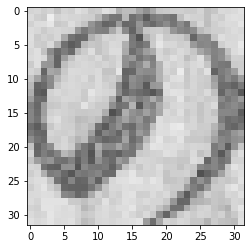

U+306E の


In [77]:
# 分類モデルpredictテスト

class_w = 32
class_h = 32

# unicodeと文字の対応表ロード
df_unicode = pd.read_csv(r'D:\work\kaggle_kuzushiji-recognition\OrigData\kuzushiji-recognition\unicode_translation.csv')

# 「の」の画像をpredictしてみる
img_letter = Image.open(r'D:\work\kaggle_kuzushiji-recognition\kuzushiji-recognition-starter\kminst\kminst\100241706_00004_2_10.jpg').convert("RGB")
img_letter = img_letter.resize((class_w, class_h))
x_gray = centernet.def_gray_aug(image=np.asarray(img_letter))["image"].astype(np.float32)
print(x_gray.shape)
plt.imshow(x_gray/255)
plt.show()

predict = (model_3.predict(x_gray.reshape(1, class_w, class_h, 3)/255))
predict = np.argmax(predict,axis=1)[0]
code = class_inv_dict_cat[str(predict)]
print(code, df_unicode[df_unicode.Unicode == code]['char'].values[0])

### predict pipeline

In [ ]:
predict_test_img_dir = out_dir+'/predict_test_img'
os.makedirs(predict_test_img_dir, exist_ok=True)

centernet.py: loaded as module file
centernet.py: loaded as module file


'U+56F3 589 658 U+7F6E 1441 1853 U+300C 934 1189 U+4E8C 762 2148 U+7F4C 394 681 U+3064 933 1023 U+7528 897 1592 U+56F2 753 2230 U+5709 562 1639 U+7F6E 1438 2005 U+3084 743 858 U+5712 1260 1804 U+300C 1607 1165 U+76EE 1441 1059 U+95E2 1277 929 U+65ED 916 882 U+7ACB 752 2349 U+7F6E 1442 1662 U+306D 555 1662 U+540C 1252 2267 U+7F6E 1606 1592 U+7F6E 1608 1876 U+76EE 739 1697 U+58F1 1605 2040 U+300D 207 1035 U+7F6E 375 928 U+53E9 207 1628 U+76EE 1259 2125 U+685D 563 1756 U+66F0 384 988 U+8272 204 1864 U+8272 766 2218 U+300C 1295 634 U+7FFC 1274 1306 U+300D 1262 2420 U+610F 384 1083 U+300C 1627 918 U+6CD5 1263 2550 U+305B 1264 2042 U+30CF 1097 1213 U+300C 563 2349 U+8272 1271 1177 U+5185 392 1579 U+6E6F 595 643 U+7F6E 1260 2396 U+4E14 572 2054 U+95A8 1254 1922 U+76EE 1282 1273 U+76EE 742 1709 U+56E3 206 1153 U+300D 208 845 U+4E14 1768 2314 U+9752 745 668 U+30CF 1087 1023 U+4E2D 196 2527 U+7528 219 704 U+85FA 1443 893 U+8A13 1617 928 U+7F6E 1438 1414 U+6A21 1439 1437 U+7528 203 2433 U+300C 56

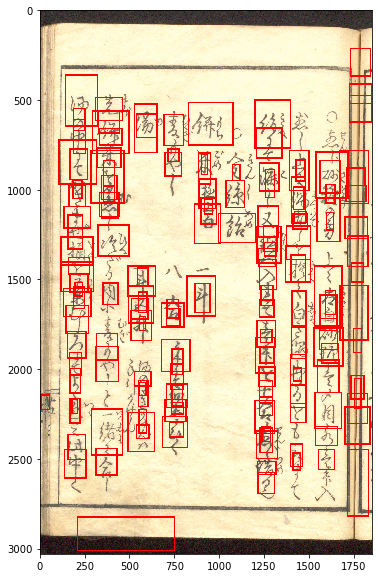

In [83]:
# validation setの画像1枚で確認
valid_jpg = [cv_list[i][0] for i in range(len(cv_list))]

ans = centernet.predict_pipeline(model_1, model_2, model_3
                                 , 0, valid_jpg
                                 , aspect_ratio_pic_all_test
                                 , class_inv_dict_cat
                                 , class_width=32, class_height=32
                                 , is_class_predict_gray=True
                                 , score_thresh=0.3, iou_thresh=0.4
                                 , out_dir=predict_test_img_dir
                                 , print_img=False
                                 #, print_img=True
                                 , is_save_predict_img=True)
print(ans)

In [85]:
df_submission = pd.read_csv(path_4)
display(df_submission.head())

# test set全件predict
#for i in tqdm(range(len(id_test))):
for i in tqdm(range(0,1)):
    ans = centernet.predict_pipeline(model_1, model_2, model_3
                                     , i, id_test
                                     , aspect_ratio_pic_all_test
                                     , class_inv_dict_cat
                                     , class_width=32, class_height=32
                                     , is_class_predict_gray=True
                                     , score_thresh=0.3, iou_thresh=0.4
                                     , out_dir=predict_test_img_dir
                                     , print_img=False
                                     #, print_img=True
                                     , is_save_predict_img=False
                                     #, is_save_predict_img=True
                                    )
    df_submission.set_value(i, 'labels', ans)
      
df_submission.to_csv(out_dir+"/submission.csv", index=False)
display(df_submission.head())

image_id                 labels
0  test_00145af3  U+003F 1 1 U+FF2F 2 2
1  test_001c37e2  U+003F 1 1 U+FF2F 2 2
2  test_003aa33a  U+003F 1 1 U+FF2F 2 2
3  test_00665e33  U+003F 1 1 U+FF2F 2 2
4  test_006964dc  U+003F 1 1 U+FF2F 2 2

C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v4\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


image_id                                             labels
0  test_00145af3  U+7C3E 1223 1424 U+6CD5 1017 3056 U+9E81 1404 ...
1  test_001c37e2                              U+003F 1 1 U+FF2F 2 2
2  test_003aa33a                              U+003F 1 1 U+FF2F 2 2
3  test_00665e33                              U+003F 1 1 U+FF2F 2 2
4  test_006964dc                              U+003F 1 1 U+FF2F 2 2